<a href="https://colab.research.google.com/github/suakow/stock_price_prediction_lstm_practice/blob/master/stock_price_lstm_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [0]:
! pip install ipython-autotime

%load_ext autotime

In [0]:
import pandas as pd

bgr_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/bgr.us.txt')
bgr_open_np = bgr_df.iloc[:, 1:2].values

time: 18.3 ms


In [0]:
bgr_df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,12.130,12.233,11.991,12.115,287699,0
1,2005-02-28,12.147,12.208,12.109,12.158,196150,0
2,2005-03-01,12.158,12.183,12.081,12.141,155314,0
3,2005-03-02,12.176,12.233,12.135,12.170,124179,0
4,2005-03-03,12.141,12.277,12.120,12.246,225421,0


time: 17.4 ms


Select only "Open" columns

In [0]:
bgr_open_np

array([[12.13 ],
       [12.147],
       [12.158],
       ...,
       [14.03 ],
       [14.   ],
       [14.04 ]])

time: 7.45 ms


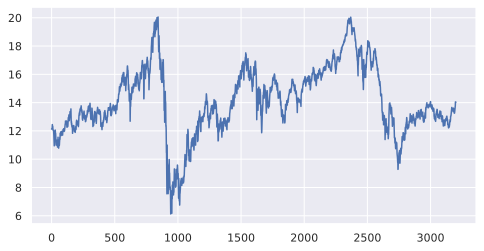

time: 265 ms


In [0]:
%config InlineBackend.figure_format = 'svg'

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(8, 4)})

plt.plot(bgr_open_np)
plt.show()

# Data Preprocessing

## Data Scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
bgr_open_scaled_np = scaler.fit_transform(bgr_open_np)

time: 2.53 ms


In [0]:
bgr_open_scaled_np

array([[0.43093343],
       [0.43215445],
       [0.43294452],
       ...,
       [0.56740024],
       [0.5652455 ],
       [0.56811848]])

time: 3.01 ms


In [0]:
bgr_open_scaled_np.shape

(3201, 1)

time: 3.07 ms


## Train / Test Preparation

In [0]:
import numpy as np

time: 1.17 ms


In [0]:
X_train = []
y_train = []

window_size = 60

for _ in range(window_size, len(bgr_open_scaled_np)) :
    X_train.append(bgr_open_scaled_np[_-window_size : _, 0])
    y_train.append(bgr_open_scaled_np[_, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

time: 10.9 ms


In [0]:
X_train.shape

(3141, 60)

time: 5.45 ms


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

time: 1.11 ms


In [0]:
X_train.shape

(3141, 60, 1)

time: 2.49 ms


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, shuffle=False, test_size=0.2)

time: 62.8 ms


# Modeling

In [0]:
import tensorflow as tf

def build_lstm(input_data, drop_out=0.2, loss: str = 'mse', optimiser: str = 'adam') :
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(tf.keras.layers.Dropout(drop_out))
    model.add(tf.keras.layers.LSTM(50, return_sequences=True))
    model.add(tf.keras.layers.Dropout(drop_out))
    model.add(tf.keras.layers.LSTM(50, return_sequences=True))
    model.add(tf.keras.layers.Dropout(drop_out))
    model.add(tf.keras.layers.LSTM(50, return_sequences=False))
    model.add(tf.keras.layers.Dropout(drop_out))
    model.add(tf.keras.layers.Dense(1))

    model.compile(optimizer=optimiser, loss=loss)
    return model

time: 16.6 ms


In [0]:
model = build_lstm(X_train)

time: 989 ms


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [0]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0266
Epoch 2/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0073
Epoch 3/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0067
Epoch 4/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0060
Epoch 5/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0059
Epoch 6/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0051
Epoch 7/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0051
Epoch 8/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0058
Epoch 9/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0045
Epoch 10/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0042
Epoch 11/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0040
Epoch 12/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0039
Epoch 13/100
79/79 [=====

time: 1min 54s


In [0]:
y_pred = model.predict(X_test)

time: 1.18 s


# Evaluation

In [0]:
plot_y_test = scaler.inverse_transform(np.array([[_] for _ in y_test]))[:,0]
plot_y_pred = scaler.inverse_transform(y_pred)[:, 0]

time: 4.44 ms


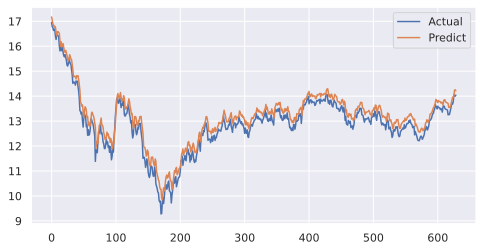

time: 235 ms


In [0]:
plt.plot(plot_y_test, label='Actual')
plt.plot(plot_y_pred, label='Predict')
plt.legend()
plt.show()